# Ghathering Data

In [1]:
#importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time
import tweepy
%matplotlib inline

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
#reading downloaded files
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#downloading image-predictions file programmatically from udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
page = requests.get(url)
with open('image-predictions.tsv','wb') as file_handling:
    file_handling.write(page.content)

In [4]:
#opening image-predictions file
image_predictions = pd.read_csv('image-predictions.tsv',sep="\t")

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '+++++'
consumer_secret = '+++++'
access_token = '+++++'
access_secret = '+++++++'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#read data from tweet-json.txt 
temp_list =[]
with open('tweet-json.txt','r') as fh:
    data =fh.readlines()
    for x in range(len(data)):
        line_json= json.loads(data[x])
        tweet_id = line_json['id_str']
        retweet_count = line_json['retweet_count']
        favorite_count = line_json['favorite_count']
        temp_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
        
tweet_counts = pd.DataFrame(temp_list, columns=['tweet_id','retweet_count','favorite_count'])

# Assessing Data

In [6]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [7]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [10]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator==170]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


In [12]:
twitter_archive_enhanced.name.value_counts()

None       745
a          55 
Charlie    12 
Cooper     11 
Oliver     11 
           .. 
Rumpole    1  
Grady      1  
Maya       1  
Moofasa    1  
Creg       1  
Name: name, Length: 957, dtype: int64

In [13]:
twitter_archive_enhanced.tweet_id.duplicated().sum()

0

In [14]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_predictions.p2_conf.min()

1.0113e-08

In [18]:
(image_predictions[image_predictions.p2_dog]).p2.value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
Kerry_blue_terrier    1  
Japanese_spaniel      1  
standard_schnauzer    1  
affenpinscher         1  
komondor              1  
Name: p2, Length: 113, dtype: int64

In [19]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
orangutan             1 
broccoli              1 
affenpinscher         1 
chimpanzee            1 
soap_dispenser        1 
Name: p3, Length: 408, dtype: int64

In [20]:
tweet_counts

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [21]:
tweet_counts.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [22]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Quality
##### `twitter_archive_enhanced` table
- timestamp column type is a string not a datetime
- remove +0000 in timestamp
- tweet_id column type is a int not a string
- rating_numerator has a error numbers.
- value 1776.00 in rating_numerator
- rating_denominator has a lower numbers.
- squad of dogs rating
- names have errors sometimes 
- not all tweets with images 
- delete non original tweets
- delete un used columns (in_reply_to_status_id, in_reply_to_user_id, source,retweeted_status_id ,retweeted_status_user_id, retweeted_status_timestamp)
- non-null object in doggo floofer pupper puppo

##### `image_predictions` table
- tweet_id column type is a int not a string
- number of records  does not equal `twitter_archive_enhanced` records
- column names does not express the meaning
- merge p_dog with p in one column to remove the silly names in p type with non values in false

##### `tweet_counts` table
- number of records  does not equal `twitter_archive_enhanced` records


#### Tidiness
##### `twitter_archive_enhanced` table
- four variables dog stages in one column  (doggo floofer pupper puppo)
- remove urls from text

- tweet_counts should be part of the `twitter_archive_enhanced` table

## Coping data frames to start cleaning

In [23]:
twitter_archive_clean= twitter_archive_enhanced.copy()
image_predictions_clean= image_predictions.copy()
tweet_counts_clean= tweet_counts.copy()

# Cleaning

##### Delete non-original tweets.

##### Define
Drop rows that have values in [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,, retweeted_status_user_id]

##### Code

In [24]:
twitter_archive_clean= twitter_archive_clean[twitter_archive_enhanced.in_reply_to_status_id.isnull()]
twitter_archive_clean= twitter_archive_clean[twitter_archive_enhanced.retweeted_status_id.isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


##### Test

In [25]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.097000e+03,0.0,0.0,0.0,0.0,2097.000000,2097.000000
mean,7.365594e+17,NaN,NaN,NaN,NaN,12.189318,10.448736
std,6.710178e+16,NaN,NaN,NaN,NaN,40.364996,6.645061
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,6.768197e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.877176e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,170.000000


### Quality
##### Delete un used columns [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id]

##### Define 
drop column [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp]

##### Code

In [26]:
twitter_archive_clean=twitter_archive_clean.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id",'retweeted_status_timestamp','source'])

##### Test 

In [27]:
twitter_archive_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


### Quality
remove +0000 in timestamp

##### Define
strip +0000 from timestamp

##### Code

In [28]:
twitter_archive_clean.timestamp= twitter_archive_clean.timestamp.str.strip('+0000')

##### Test

In [29]:
twitter_archive_clean.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2351    2015-11-16 00:24:50 
2352    2015-11-16 00:04:52 
2353    2015-11-15 23:21:54 
2354    2015-11-15 23:05:30 
2355    2015-11-15 22:32:08 
Name: timestamp, Length: 2097, dtype: object

### Quality
- timestamp column type in `twitter_archive_enhanced` is a string not a datetime

##### Define
 use pd.to_datetime to convert timestamp type 

##### Code

In [30]:
twitter_archive_clean.timestamp= pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [31]:
twitter_archive_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2097, dtype: datetime64[ns]

### Quality
- tweet_id column type in `twitter_archive_enhanced` is a int not a string

##### Define
Use .astype to change type

##### Code

In [32]:
twitter_archive_clean.tweet_id= twitter_archive_clean.tweet_id.astype(str)


##### Test

In [33]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

In [34]:
twitter_archive_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2097, dtype: datetime64[ns]

### Quality
- tweet_id column in `image_predictions` type is a int not a string

##### Define
Use .astype to change type

##### Code

In [35]:
image_predictions_clean.tweet_id= image_predictions.tweet_id.astype(str)

##### Test

In [36]:
image_predictions_clean.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

### Quality
- Delete tweets without images 

##### Define 
merge image prediction tweet id to remove records without images

##### Code

In [37]:
twitter_archive_clean= twitter_archive_clean.merge(image_predictions_clean.tweet_id,on='tweet_id')

##### Test

In [38]:
twitter_archive_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
1967,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
1968,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
1969,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


### Tidiness
##### - tweet_counts should be part of the `twitter_archive_enhanced` table

##### Define
Merge weet_counts with twitter_archive on tweet_id

##### Code

In [39]:
twitter_archive_clean= twitter_archive_clean.merge(tweet_counts_clean,on='tweet_id')

##### Test

In [40]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9774,41048


### Quality
- rating_numerator has a error numbers.

##### Define
extract rating_numerator from text useing regular expresion

##### Code

In [41]:
twitter_archive_clean.rating_numerator =(twitter_archive_clean.text.str.extract('(\d+\.\d+/\d+|\d+/\d+)',expand=True))[0].str.split('/',expand=True)[0].astype(float)


##### Test

In [42]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00       95 
7.00       52 
14.00      33 
6.00       32 
5.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
60.00      1  
24.00      1  
99.00      1  
1776.00    1  
13.50      1  
11.27      1  
165.00     1  
11.26      1  
0.00       1  
84.00      1  
9.75       1  
45.00      1  
88.00      1  
144.00     1  
44.00      1  
121.00     1  
204.00     1  
50.00      1  
80.00      1  
420.00     1  
Name: rating_numerator, dtype: int64

### Quality
- value 1776.00 in rating_numerator

##### Define
replace this value with the max value in numertor

##### Code

In [43]:
twitter_archive_clean.rating_numerator= twitter_archive_clean.rating_numerator.replace(to_replace=[1776.00 ],value=[14])

##### Test

In [44]:
twitter_archive_clean.rating_numerator.value_counts()

12.00     446
10.00     417
11.00     392
13.00     253
9.00      150
8.00      95 
7.00      52 
14.00     34 
6.00      32 
5.00      32 
3.00      19 
4.00      16 
2.00      9  
1.00      5  
45.00     1  
24.00     1  
99.00     1  
11.27     1  
13.50     1  
165.00    1  
11.26     1  
0.00      1  
84.00     1  
9.75      1  
80.00     1  
88.00     1  
144.00    1  
44.00     1  
60.00     1  
121.00    1  
204.00    1  
50.00     1  
420.00    1  
Name: rating_numerator, dtype: int64

### Quality
- rating_denominator has a small numbers.

##### assessing

In [45]:
twitter_archive_clean.rating_denominator.value_counts()

10     1954
50     3   
80     2   
11     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [46]:
twitter_archive_clean[twitter_archive_clean.rating_denominator==2].text

1950    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

In [47]:
twitter_archive_clean[twitter_archive_clean.rating_numerator==1].text

1501    What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0                   
1713    Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO    
1877    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
1950    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv    
1953    Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX      
Name: text, dtype: object

In [48]:
twitter_archive_clean[twitter_archive_clean.rating_denominator==7].text

382    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object

##### Define
replace numerator at index 1950 with 9 and denominator with 10
replace numerator at index 382 with non and denominator with non
replace numerator at index 1696 with non and denominator with non

##### Code

In [49]:
twitter_archive_clean.iloc[1950,4] =9
twitter_archive_clean.iloc[1950,5]= 10

In [50]:
twitter_archive_clean.iloc[382,4] = None
twitter_archive_clean.iloc[382,5] = None

In [51]:
twitter_archive_clean.iloc[1696,4] = None
twitter_archive_clean.iloc[1696,5] = None

##### Test

In [52]:
twitter_archive_clean.iloc[1950]

tweet_id              666287406224695296                                                                                                                      
timestamp             2015-11-16 16:11:11                                                                                                                     
text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
expanded_urls         https://twitter.com/dog_rates/status/666287406224695296/photo/1                                                                         
rating_numerator      9                                                                                                                                       
rating_denominator    10                                                                                                                                      
name                  an                      

In [53]:
twitter_archive_clean.iloc[382]

tweet_id              810984652412424192                                                                                                                                                       
timestamp             2016-12-19 23:06:23                                                                                                                                                      
text                  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
expanded_urls         https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1                                                                      
rating_numerator      NaN                                                                                                                                                                      
rating_denominator    NaN               

### Quality
- squad of dogs rating

##### Define
get the average rate

##### Code

In [54]:
for x in twitter_archive_clean.index:
    if twitter_archive_clean.iloc[x,5] > 10:
        twitter_archive_clean.iloc[x,4]= twitter_archive_clean.iloc[x,4]/(twitter_archive_clean.iloc[x,5]/10)
        twitter_archive_clean.iloc[x,5]= 10

##### Test

In [55]:
twitter_archive_clean.rating_denominator.value_counts()

10.0    1969
Name: rating_denominator, dtype: int64

In [56]:
twitter_archive_clean.rating_numerator.value_counts()

12.000000    450
10.000000    419
11.000000    397
13.000000    253
9.000000     151
8.000000     95 
7.000000     51 
14.000000    34 
5.000000     32 
6.000000     32 
3.000000     19 
4.000000     15 
2.000000     10 
1.000000     4  
8.181818     1  
9.750000     1  
0.000000     1  
13.500000    1  
11.260000    1  
11.270000    1  
6.363636     1  
Name: rating_numerator, dtype: int64

### Quality
- names have errors sometimes in `twitter_archive_enhanced` table

##### Define 
replace 'a' and 'an with none

##### Code

In [57]:
twitter_archive_clean.name.replace(to_replace='a',value=None,inplace=True)
twitter_archive_clean.name.replace(to_replace='an',value=None,inplace=True)

##### Test

In [58]:
sum(twitter_archive_clean.name == 'a')

0

In [59]:
sum(twitter_archive_clean.name == 'an')

0

### Quality

- non-null object in doggo floofer pupper puppo

##### Define
replace None from string to null

##### Code

In [60]:
twitter_archive_clean.doggo.replace(to_replace='None',value="",inplace=True)
twitter_archive_clean.floofer.replace(to_replace="None",value="",inplace=True)
twitter_archive_clean.pupper.replace(to_replace='None',value="",inplace=True)
twitter_archive_clean.puppo.replace(to_replace='None',value="",inplace=True)

##### Test

In [61]:
twitter_archive_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,,,,,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,,,,,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,,,,,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,,,,,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,,,,,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,,,,,41,111
1967,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,None,,,,,147,311
1968,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,None,,,,,47,128
1969,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,None,,,,,48,132


#### Tidiness
##### `twitter_archive_enhanced` table
- four variables dog stages in one column  (doggo floofer pupper puppo)

##### Define
concat 4 columns in one column and drop them

##### Code

In [62]:
twitter_archive_clean['dog_breed']= twitter_archive_clean['doggo']+ twitter_archive_clean['floofer']+ twitter_archive_clean['pupper']+ twitter_archive_clean['puppo']
twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

##### Test

In [63]:
twitter_archive_clean.dog_breed.value_counts()

                1668
pupper          201 
doggo           63  
puppo           22  
doggopupper     8   
floofer         7   
doggofloofer    1   
doggopuppo      1   
Name: dog_breed, dtype: int64

##### define 
removing empty values

##### Code

In [64]:
twitter_archive_clean.dog_breed.replace(to_replace='',
    value=np.nan,inplace=True)

##### Test

In [65]:
twitter_archive_clean.dog_breed.value_counts()

pupper          201
doggo           63 
puppo           22 
doggopupper     8  
floofer         7  
doggofloofer    1  
doggopuppo      1  
Name: dog_breed, dtype: int64

#### Tidiness

- remove urls from text in `twitter_archive_enhanced`

##### Define 
strip url from text because there is a column for url

##### Code

In [66]:
for x in twitter_archive_clean.index:
    sl= twitter_archive_clean.text[x].rfind('https')
    twitter_archive_clean.text[x]= twitter_archive_clean.text[x][:sl]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Test

In [67]:
twitter_archive_clean.text

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                      
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                  
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                            
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
                                                                           ...                                                                     
1966    Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10        

### Quality

- number of records in image_predictions does not equal `twitter_archive_enhanced` records

##### Define
merge tweet id from twitter_archive_clean to drop unused records

In [68]:
image_predictions_clean.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

##### Code

In [69]:
image_predictions_clean= image_predictions_clean.merge(twitter_archive_clean.tweet_id,on='tweet_id')

##### Test

In [70]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1966,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1967,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1968,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1969,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Quality

- column names in image_predictions does not express the meaning

##### Define
rename columns

##### Code

In [71]:
image_predictions_clean.rename(columns={'p1_conf':'confidence_in_p1','p2_conf':'confidence_in_p2','p3_conf':'confidence_in_p3',\
                                       'p1':'prediction1_dog_type','p2':'prediction2_dog_type','p3':'prediction3_dog_type'},inplace=True)

##### Test

In [72]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,prediction1_dog_type,confidence_in_p1,p1_dog,prediction2_dog_type,confidence_in_p2,p2_dog,prediction3_dog_type,confidence_in_p3,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Quality

- merge p_dog with p in one column to remove the silly names in p type with non values in false

##### Define
merge two columns and remove p_dog

##### Code

In [73]:
image_predictions_clean.prediction1_dog_type=image_predictions_clean.prediction1_dog_type[image_predictions_clean.p1_dog]
image_predictions_clean.prediction2_dog_type=image_predictions_clean.prediction2_dog_type[image_predictions_clean.p2_dog]
image_predictions_clean.prediction3_dog_type=image_predictions_clean.prediction3_dog_type[image_predictions_clean.p3_dog]
image_predictions_clean.drop(columns=['p1_dog','p2_dog','p3_dog'],inplace=True)

##### Test

In [74]:
image_predictions_clean

,tweet_id,jpg_url,img_num,prediction1_dog_type,confidence_in_p1,prediction2_dog_type,confidence_in_p2,prediction3_dog_type,confidence_in_p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629
...,...,...,...,...,...,...,...,...,...
1966,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219
1967,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,Labrador_retriever,0.168086,NaN,0.040836
1968,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
1969,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957


### Assessing before Storing 

In [75]:
twitter_archive_clean


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,41048,NaN
...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,41,111,NaN
1967,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,None,147,311,NaN
1968,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,None,47,128,NaN
1969,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,None,48,132,NaN


### Quality
remove repated urls in expanded_urls

##### Define
split string using comma and take the first

#### Code

In [76]:
twitter_archive_clean.expanded_urls =twitter_archive_clean.expanded_urls.str.split(',',expand=True)[0]

#### Test

In [77]:
twitter_archive_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,9774,41048,NaN
...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,41,111,NaN
1967,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,None,147,311,NaN
1968,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,None,47,128,NaN
1969,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,None,48,132,NaN


# Storing Data

In [78]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)
image_predictions_clean.to_csv('image_predictions_master.csv',index=False)

# Analysis and visualization of data

### 1- draw time series for retweet_count

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


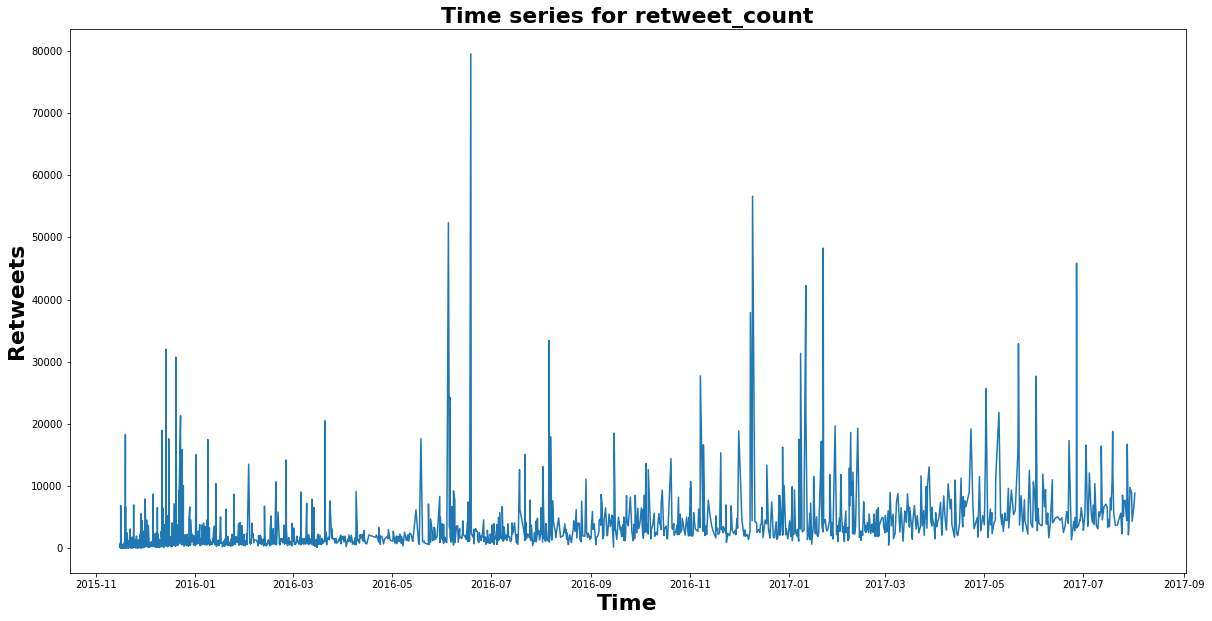

In [79]:
fig  = plt.subplots(figsize=(20, 10))
fig= plt.plot(twitter_archive_clean.timestamp,twitter_archive_clean.retweet_count)
plt.title('Time series for retweet_count',fontdict={'weight' : 'bold','size'   : 22});
plt.xlabel('Time',fontdict={'weight' : 'bold','size'   : 22})
plt.ylabel('Retweets',fontdict={'weight' : 'bold','size'   : 22});
plt.savefig('time_series_for_retweet_count.png', dpi=250)


#### AS noticed from graph retweets increase with time

### 2- draw time series for favorite_count

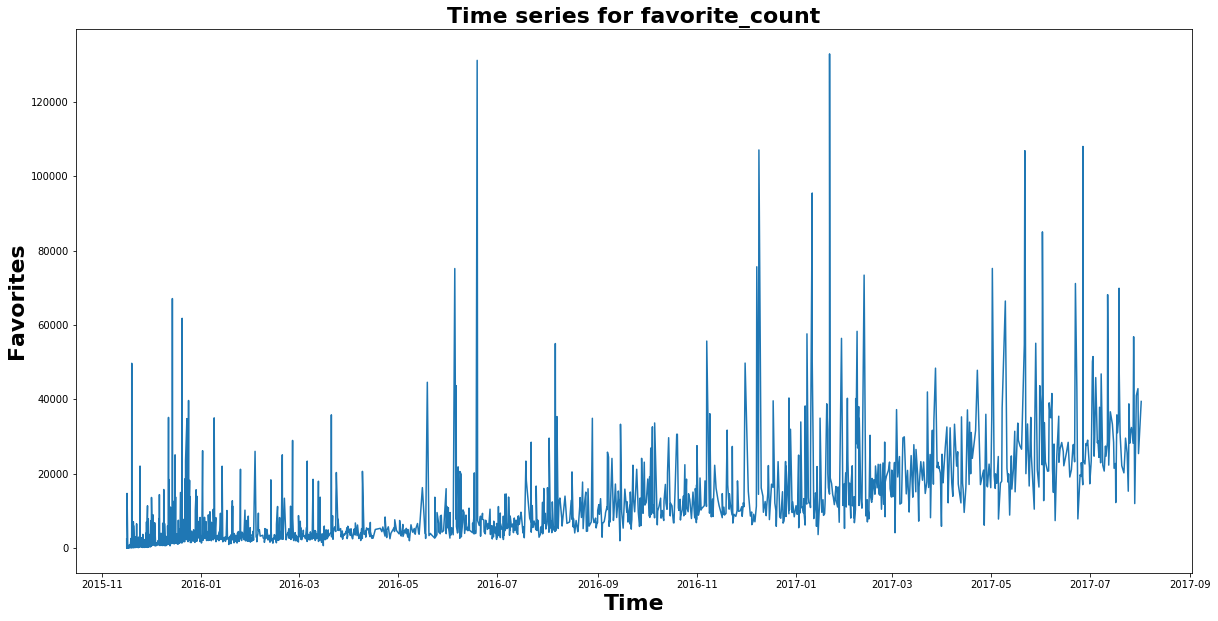

In [80]:
fig  = plt.subplots(figsize=(20, 10))
fig= plt.plot(twitter_archive_clean.timestamp,twitter_archive_clean.favorite_count)
plt.title('Time series for favorite_count',fontdict={'weight' : 'bold','size'   : 22});
plt.xlabel('Time',fontdict={'weight' : 'bold','size'   : 22})
plt.ylabel('Favorites',fontdict={'weight' : 'bold','size'   : 22});
plt.savefig('time_series_for_favorite_count.png', dpi=250)


##### Also noticed from graph favorite_counts increase with time

### 3-drawing histogram for rateing

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


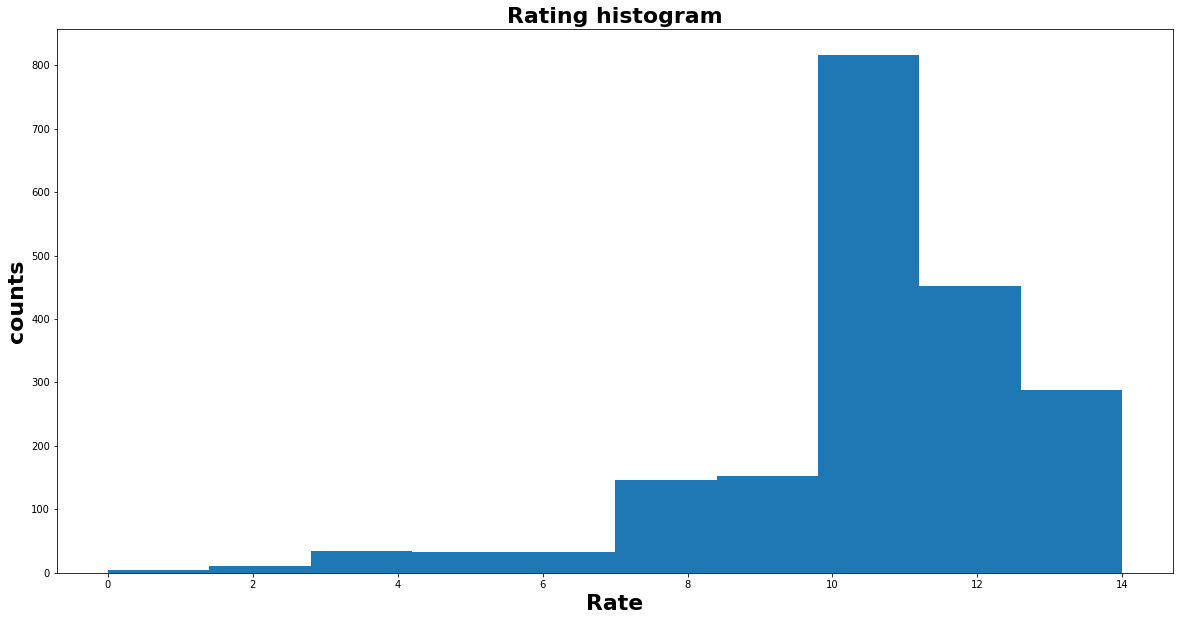

In [81]:
fig  = plt.subplots(figsize=(20, 10))
fig= plt.hist(twitter_archive_clean.rating_numerator)
plt.title('Rating histogram',fontdict={'weight' : 'bold','size'   : 22});
plt.xlabel('Rate',fontdict={'weight' : 'bold','size'   : 22})
plt.ylabel('counts',fontdict={'weight' : 'bold','size'   : 22});
plt.savefig('rating_histogram.png', dpi=250)


### 4-drawing time series for rating


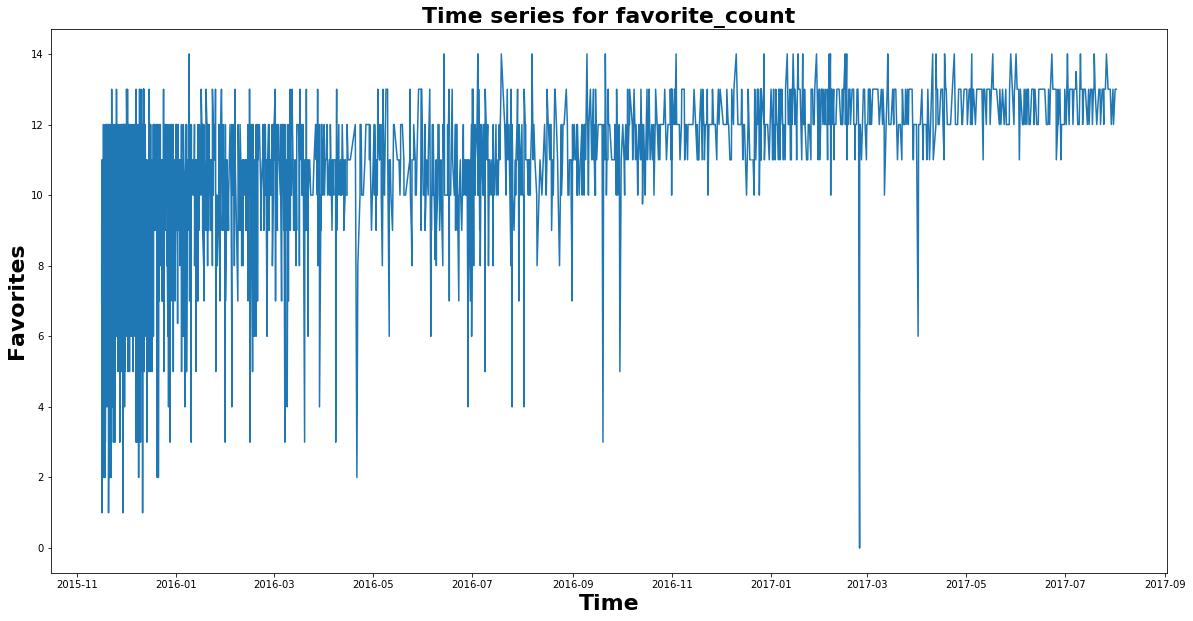

In [82]:

fig  = plt.subplots(figsize=(20, 10))
fig= plt.plot(twitter_archive_clean.timestamp,twitter_archive_clean.rating_numerator)
plt.title('Time series for favorite_count',fontdict={'weight' : 'bold','size'   : 22});
plt.xlabel('Time',fontdict={'weight' : 'bold','size'   : 22})
plt.ylabel('Favorites',fontdict={'weight' : 'bold','size'   : 22});
plt.savefig('rating_numerator.png', dpi=250)


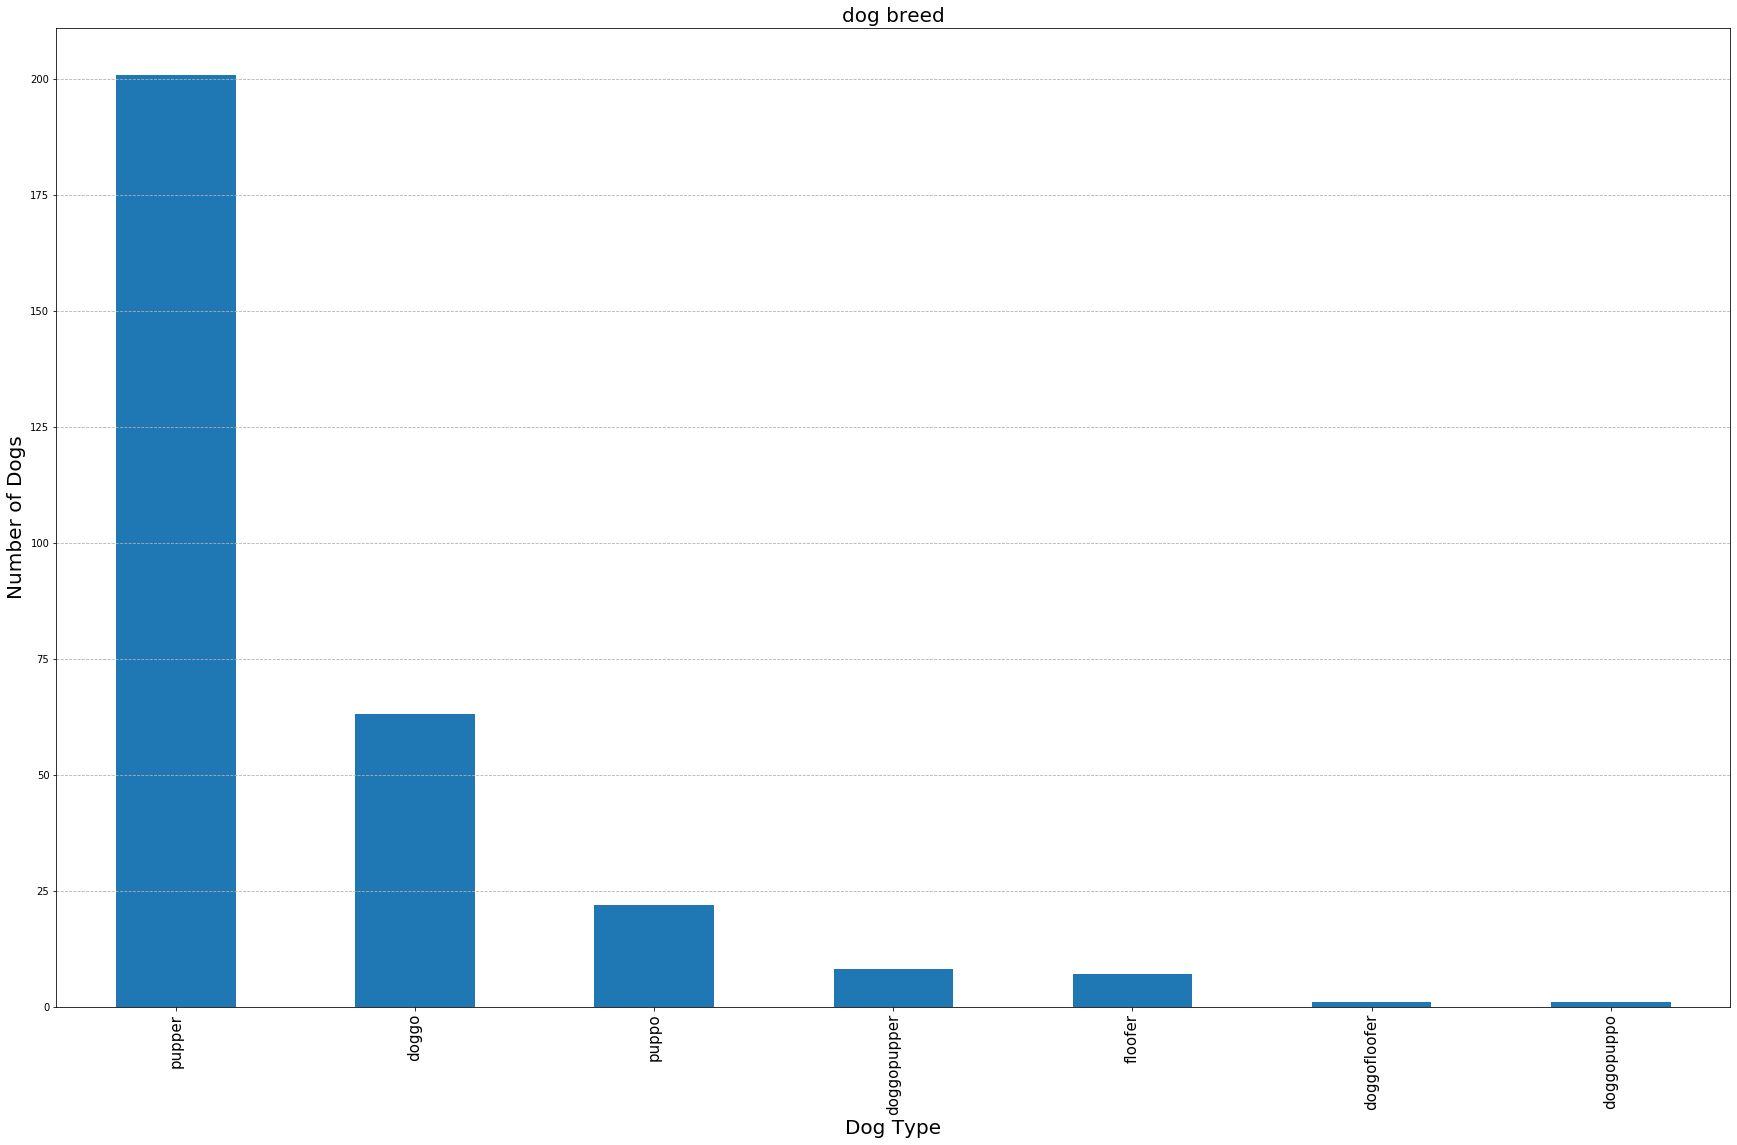

In [83]:
twitter_archive_clean.dog_breed.value_counts().plot(kind='bar',figsize=(30,18));
plt.grid(axis='y',linestyle='dashed')
plt.title('dog breed',fontdict={'fontsize':20})
plt.xlabel('Dog Type',fontdict={'fontsize':20})
plt.ylabel('Number of Dogs',fontdict={'fontsize':20});
plt.yticks()
plt.xticks(fontsize=15)
plt.savefig('dog_breed.png', dpi=300 ,bbox_inches='tight')


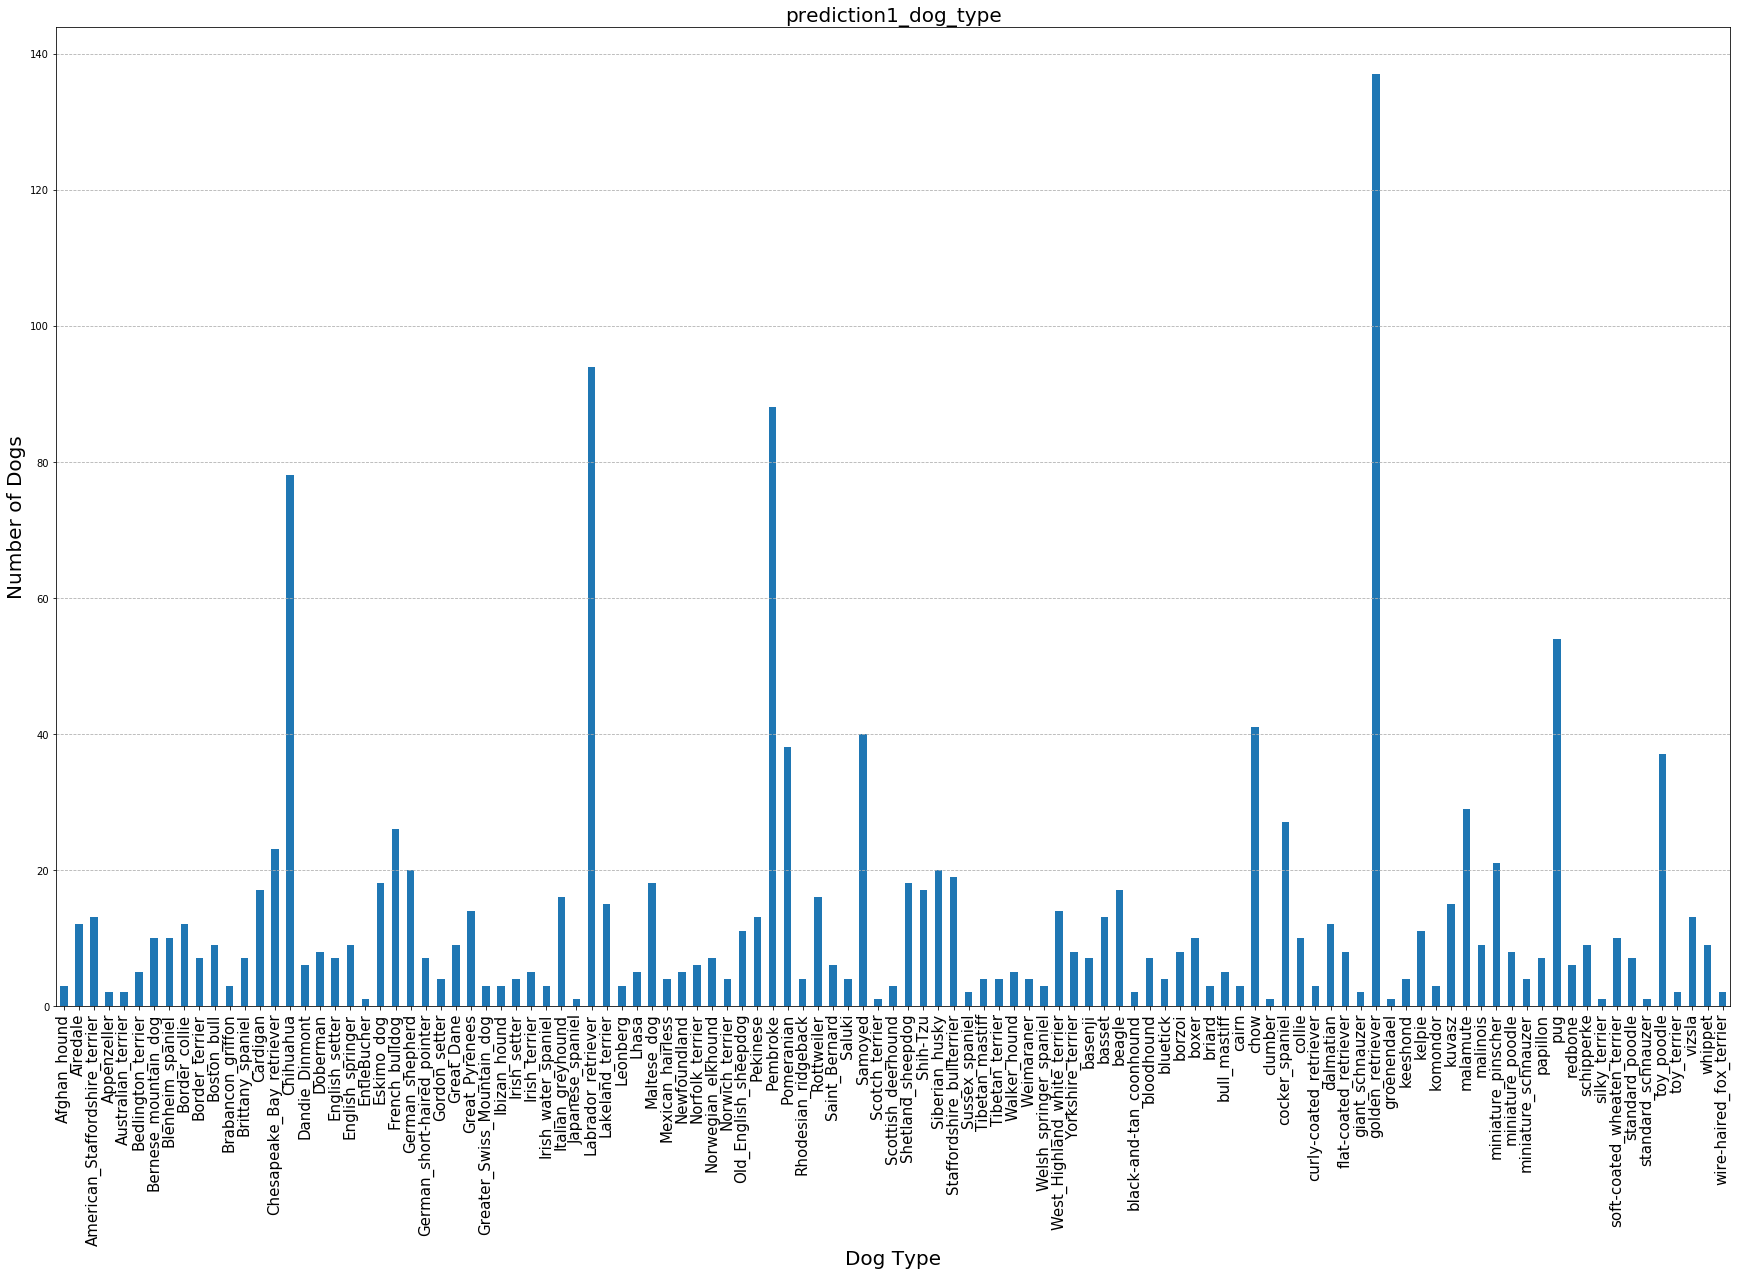

In [84]:
image_predictions_clean.groupby('prediction1_dog_type').count().tweet_id.plot(kind='bar',figsize=(30,18));
plt.grid(axis='y',linestyle='dashed')
plt.title('prediction1_dog_type',fontdict={'fontsize':20})
plt.xlabel('Dog Type',fontdict={'fontsize':20})
plt.ylabel('Number of Dogs',fontdict={'fontsize':20});
plt.yticks()
plt.xticks(fontsize=15)
plt.savefig('prediction1_dog_type.png', dpi=300 ,bbox_inches='tight')


In [85]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1969.000000,1969.0,1971.000000,1971.000000
mean,10.539017,10.0,2784.449518,8949.106545
std,2.175596,0.0,4697.662893,12267.799790
min,0.000000,10.0,16.000000,81.000000
25%,10.000000,10.0,628.500000,1997.000000
50%,11.000000,10.0,1367.000000,4147.000000
75%,12.000000,10.0,3239.000000,11402.500000
max,14.000000,10.0,79515.000000,132810.000000


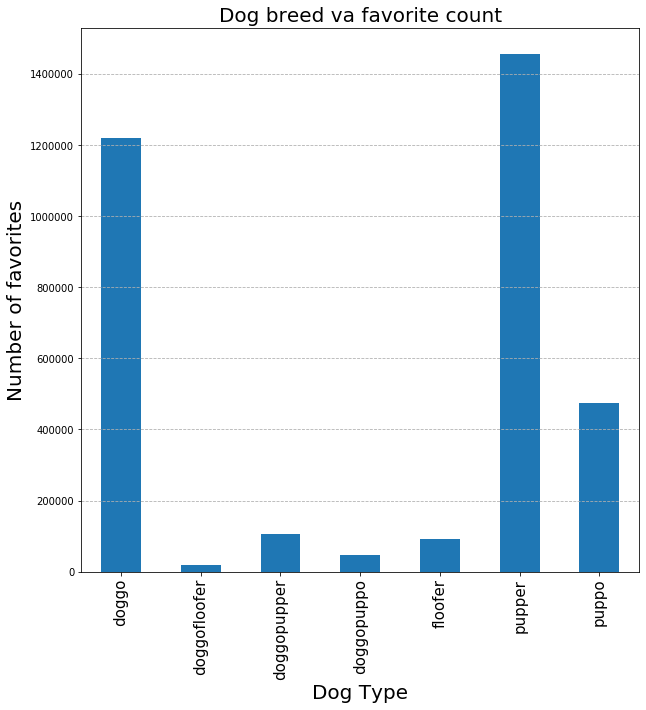

In [86]:
fig = twitter_archive_clean.groupby('dog_breed').sum().favorite_count.plot(kind='bar',figsize=(10,10));

plt.grid(axis='y',linestyle='dashed')
plt.title('Dog breed va favorite count',fontdict={'fontsize':20})
plt.xlabel('Dog Type',fontdict={'fontsize':20})
plt.ylabel('Number of favorites',fontdict={'fontsize':20});
plt.yticks()
plt.xticks(fontsize=15)
plt.savefig('dog_breed_favorite_count.png', dpi=300 ,bbox_inches='tight')


In [87]:
twitter_archive_clean.groupby('dog_breed').mean().rating_numerator

dog_breed
doggo           11.888889
doggofloofer    11.000000
doggopupper     11.000000
doggopuppo      13.000000
floofer         12.000000
pupper          10.638159
puppo           12.000000
Name: rating_numerator, dtype: float64

In [88]:
twitter_archive_clean['year']=twitter_archive_clean.timestamp.dt.year
twitter_archive_clean['month']=twitter_archive_clean.timestamp.dt.month

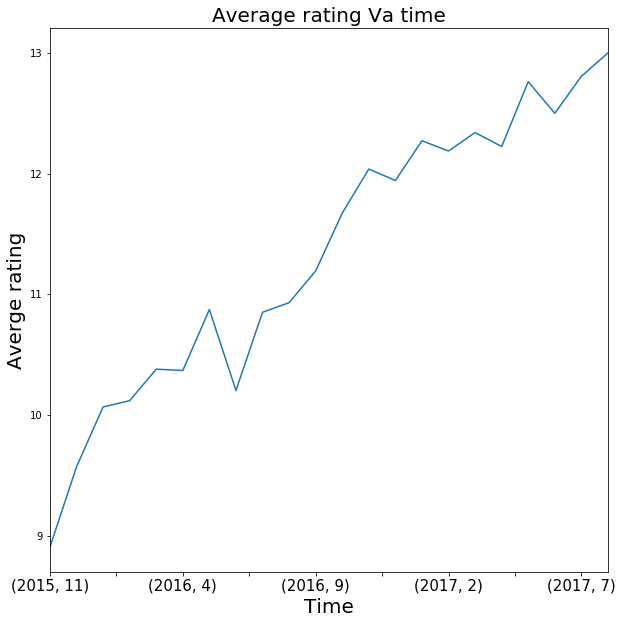

In [89]:
twitter_archive_clean.groupby(['year','month']).mean().rating_numerator.plot(figsize=(10,10));
plt.title('Average rating Va time',fontdict={'fontsize':20})
plt.xlabel('Time',fontdict={'fontsize':20})
plt.ylabel('Averge rating',fontdict={'fontsize':20});
plt.yticks()
plt.xticks(fontsize=15)
plt.savefig('Average_rating_Va_time.png', dpi=300 ,bbox_inches='tight')

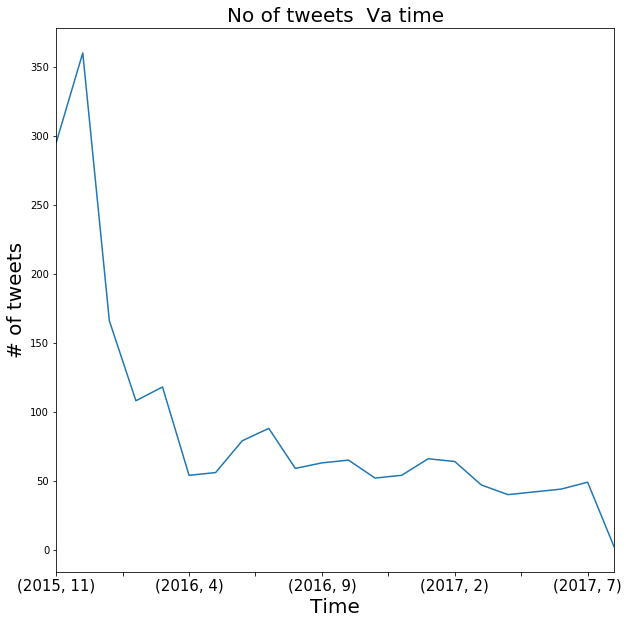

In [90]:
twitter_archive_clean.groupby(['year','month']).count().tweet_id.plot(figsize=(10,10));
plt.title('No of tweets  Va time',fontdict={'fontsize':20})
plt.xlabel('Time',fontdict={'fontsize':20})
plt.ylabel('# of tweets',fontdict={'fontsize':20});
plt.yticks()
plt.xticks(fontsize=15)
plt.savefig('number_of_tweets_Va_time.png', dpi=300 ,bbox_inches='tight')